# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

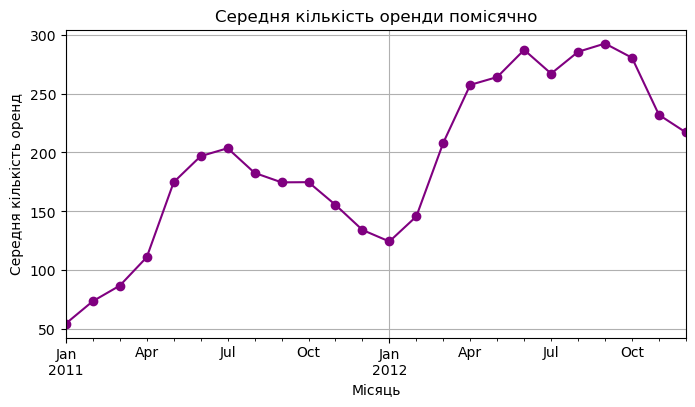

In [2]:
monthly_avg = df['count'].resample('ME').mean()
monthly_avg.plot(
    figsize=(8, 4),
    marker='o',
    color='purple',
    title='Середня кількість оренди помісячно',
    xlabel='Місяць',
    ylabel='Середня кількість оренд'
)
plt.grid(True)
plt.show();

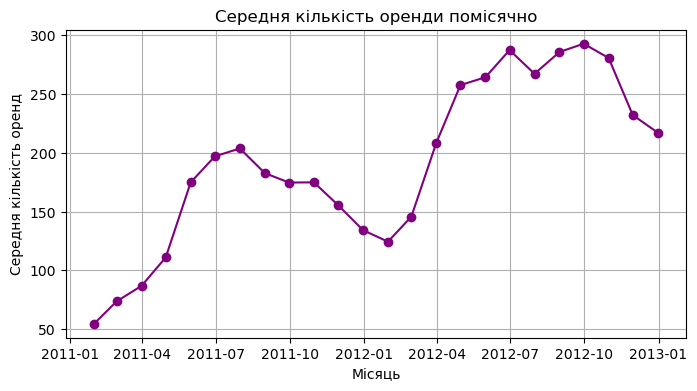

In [3]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='purple')
plt.title('Середня кількість оренди помісячно')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show();

**Відмінність не у візуальному вигляді , а у рівні контролю. З Matplotlib ми маємо контроль над кожним елементом графіка.**

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [4]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

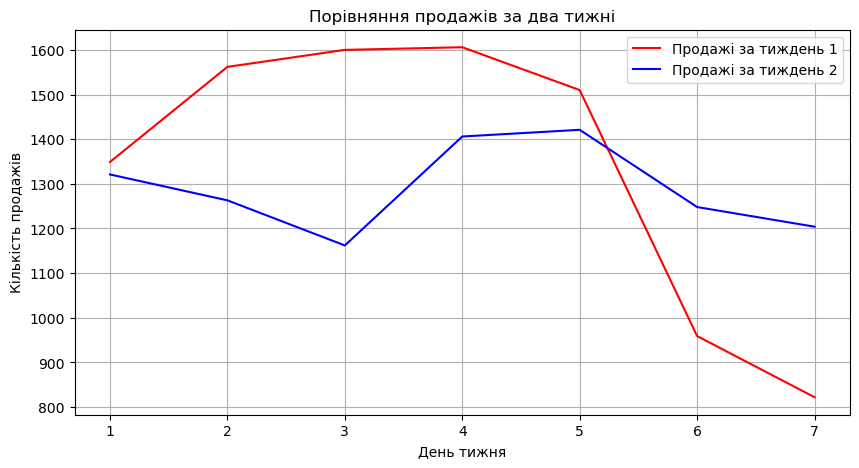

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(days, sales_week1, color='red', label='Продажі за тиждень 1')
plt.plot(days, sales_week2, color='blue', label='Продажі за тиждень 2')
plt.legend()
plt.title('Порівняння продажів за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
plt.grid(True)
plt.show();

**Судячи з графіку продажі були більш стабільними в другому тижні. Так, я можу свій висновок підкріпити обчисленнями. Можу подивитись на різницю між максимальним та мінімальним значенням продажів, чим менше буде це значення , тим стабільніші були продажі.**

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

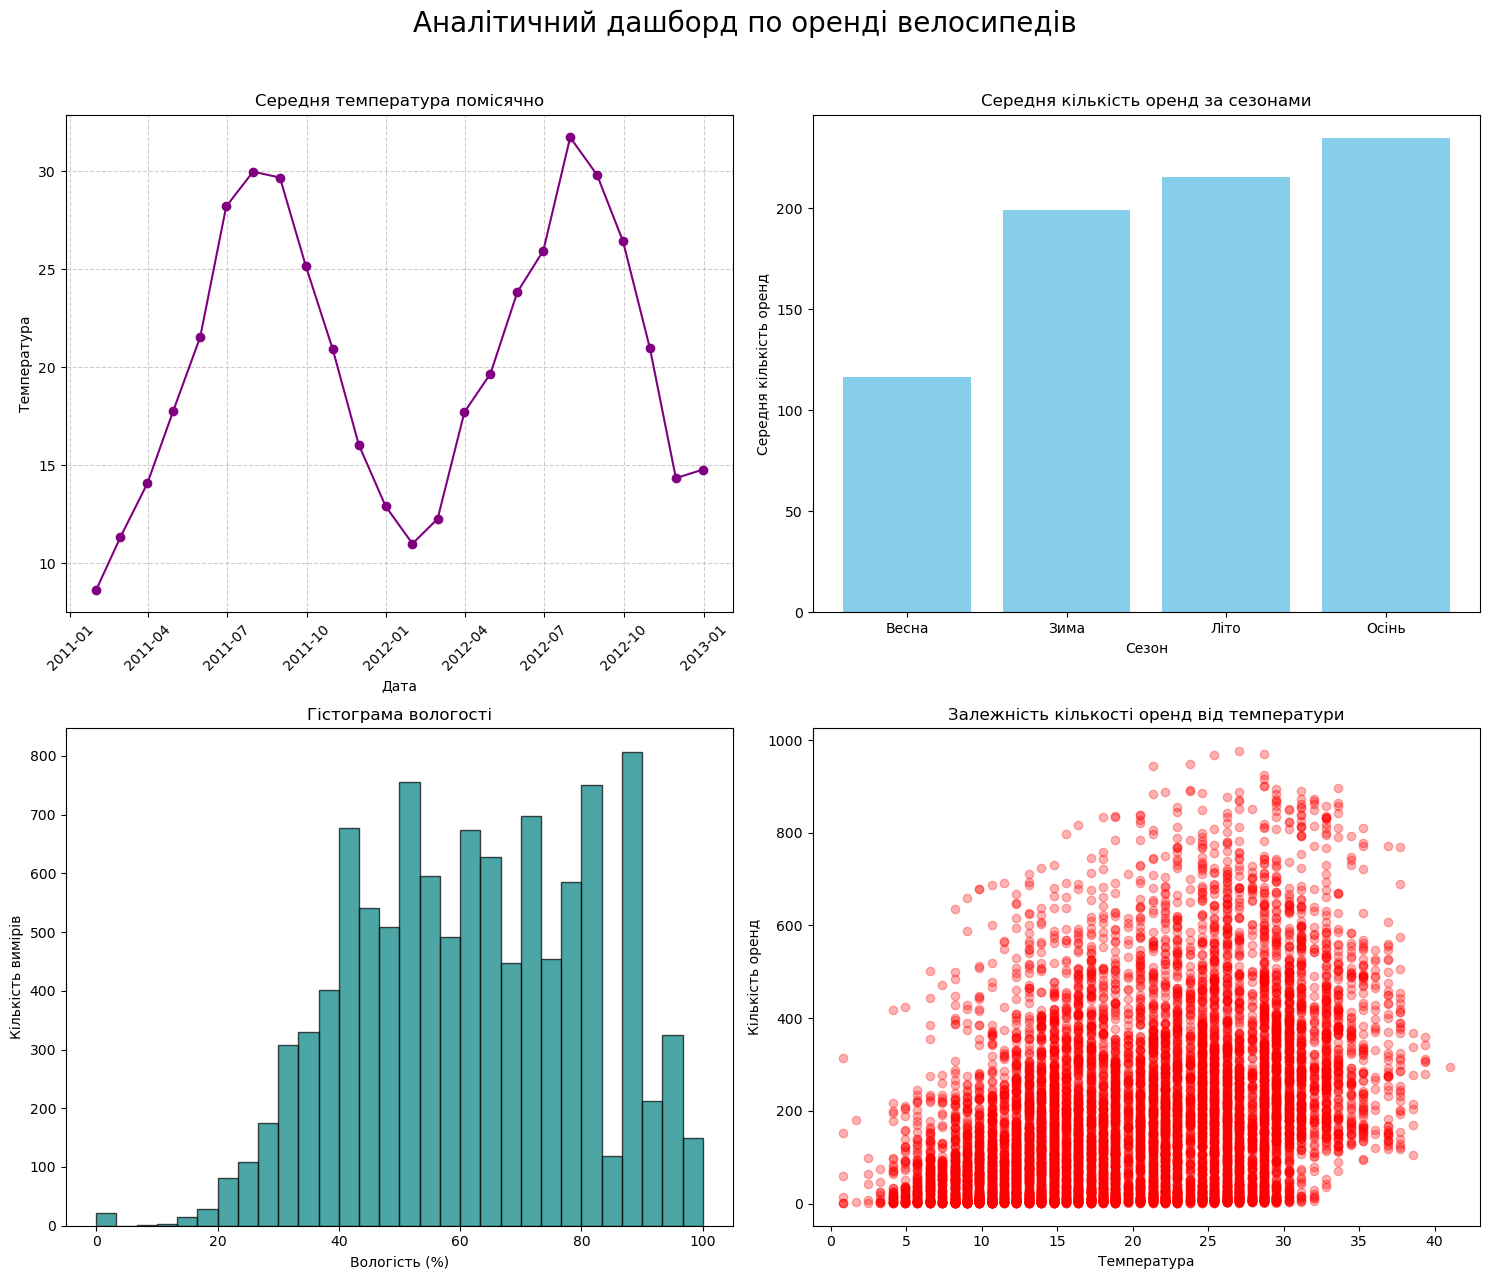

In [6]:
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

plt.figure(figsize=(15, 13))
plt.suptitle('Аналітичний дашборд по оренді велосипедів', fontsize=20)

# Лінійний графік
plt.subplot(2, 2, 1)
monthly_avg_temp = df['temp'].resample('ME').mean()
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', color='purple')
plt.title('Середня температура помісячно')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Стовпчикова діаграма
plt.subplot(2, 2, 2)
season_avg_count = df.groupby('season_name')['count'].mean()
plt.bar(season_avg_count.index,season_avg_count.values, color='skyblue')
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')


#Гістограма
plt.subplot(2, 2, 3)
humidity = df['humidity']
plt.hist(humidity, bins=30, color='teal', alpha=0.7, edgecolor='black')
plt.title('Гістограма вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість вимірів')


#Scatter plot
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.3, color='red')
plt.title('Залежність кількості оренд від температури')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

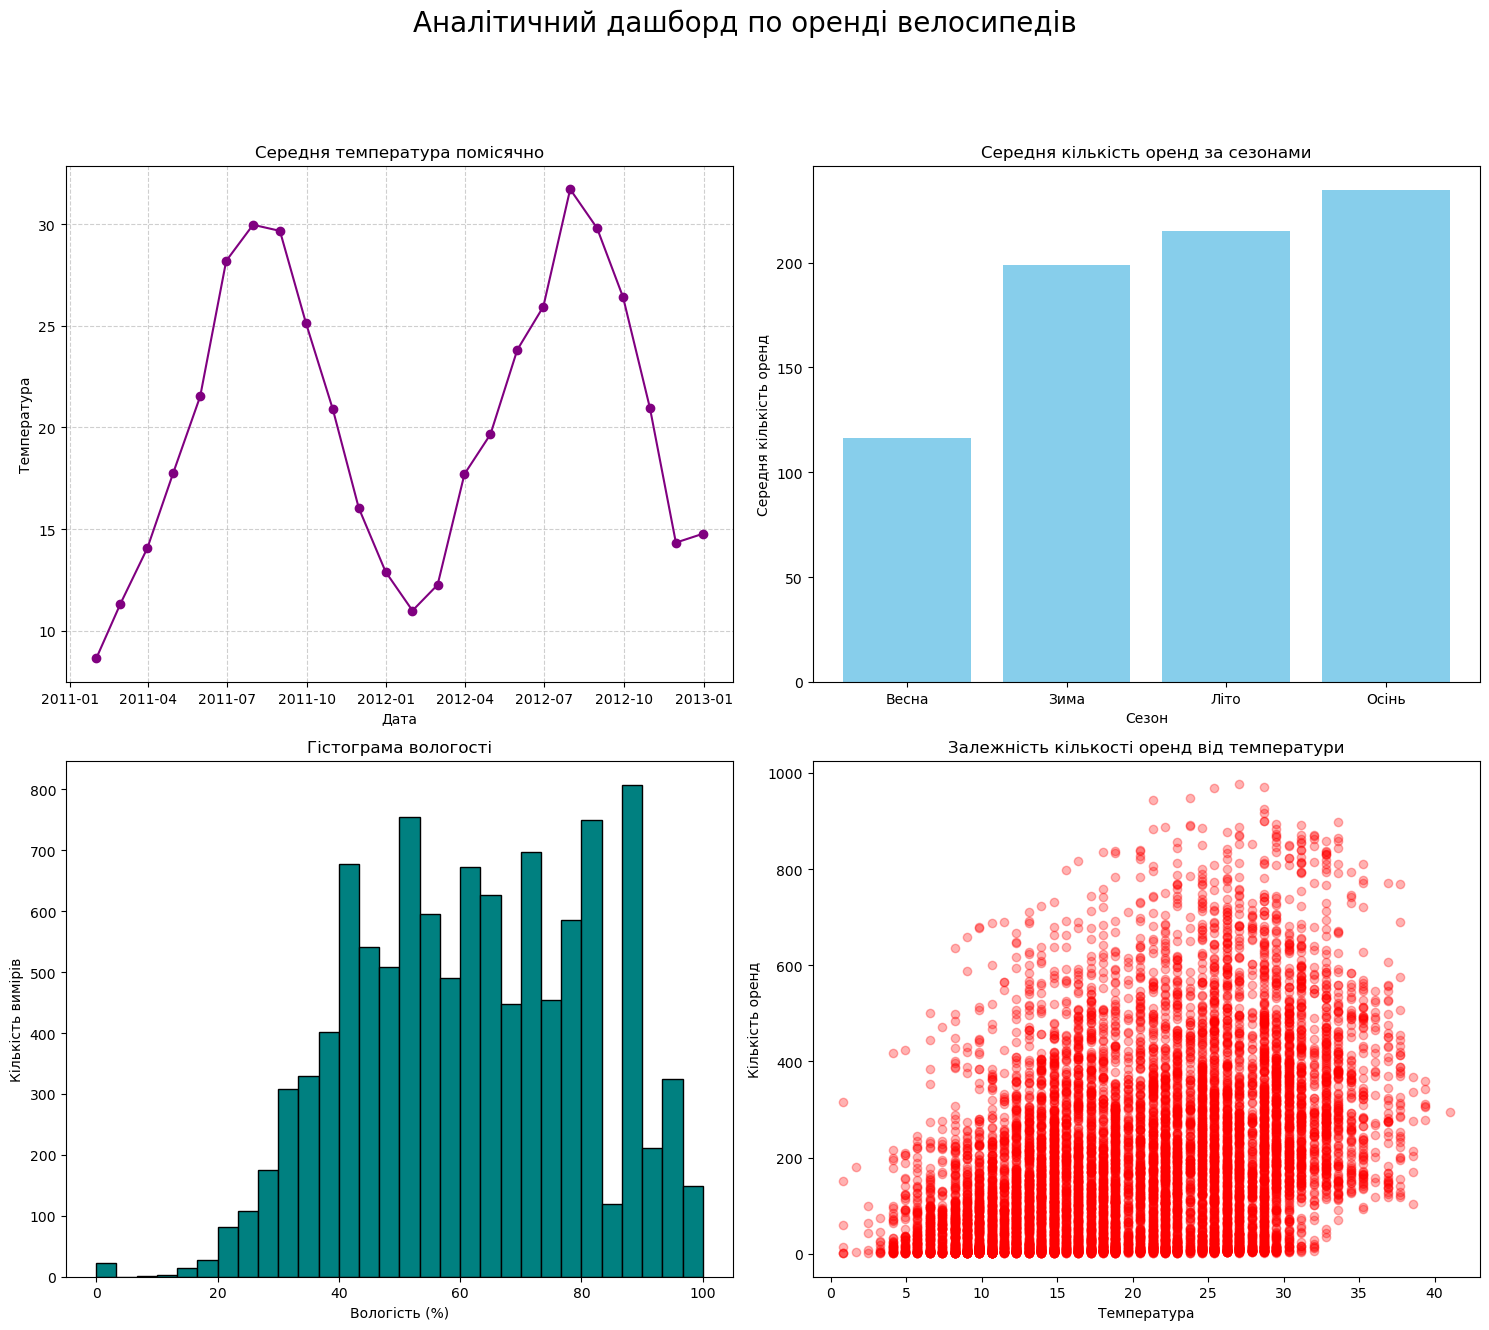

In [7]:
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 13))
fig.suptitle('Аналітичний дашборд по оренді велосипедів', fontsize=20, y=1.02)

#Лінійний графік
monthly_avg_temp = df['temp'].resample('ME').mean()
ax[0, 0].plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', color='purple')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Дата')
ax[0, 0].set_ylabel('Температура')
ax[0, 0].grid(True, linestyle='--', alpha=0.6)

#Стовпчикова діаграма
season_avg_count = df.groupby('season_name')['count'].mean()
ax[0, 1].bar(season_avg_count.index, season_avg_count.values, color='skyblue')
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Середня кількість оренд')

#Гістограма
ax[1, 0].hist(df['humidity'], bins=30, color='teal', edgecolor='black')
ax[1, 0].set_title('Гістограма вологості')
ax[1, 0].set_xlabel('Вологість (%)')
ax[1, 0].set_ylabel('Кількість вимірів')

#Scatter plot
ax[1, 1].scatter(df['temp'], df['count'], alpha=0.3, color='red')
ax[1, 1].set_title('Залежність кількості оренд від температури')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

**plt.subplots() дає повний контроль над кожним графіком , легко можна налаштувати кожен графік окремо. А plt.subplot() це коли хочется швидко додати графіки однин за одним , без тонких налаштувань.**

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

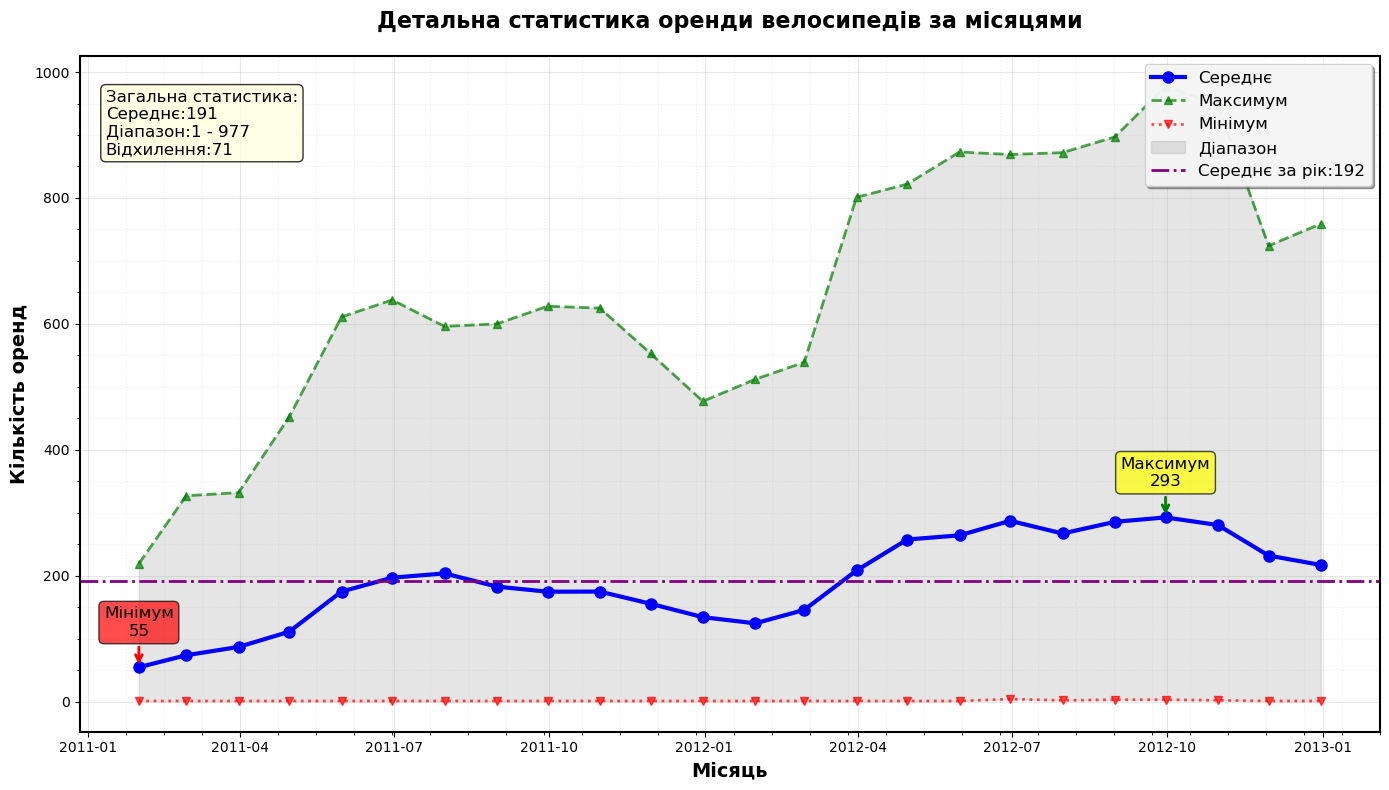

In [14]:
monthly_stats = df.resample('ME')['count'].agg(['mean', 'max', 'min'])
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3, label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^',linewidth=2, label='Максимум',markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2, label='Мінімум', markersize=6, alpha=0.7)
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], alpha=0.2, color='gray', label='Діапазон')
max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
ax.annotate(f'Максимум\n{max_val:.0f}', xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
arrowprops=dict(arrowstyle='->', color='green', lw=2),fontsize=12, ha='center',bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow',alpha=0.7))
min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()            
ax.annotate(f'Мінімум\n{min_val:.0f}', xy=(min_idx, min_val), xytext=(min_idx, min_val + 50),
arrowprops=dict(arrowstyle='->', color='red', lw=2), fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.7))
ax.set_title('Детальна статистика оренди велосипедів за місяцями', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.grid(True, which='major', linestyle='-',alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()
overall_mean = df['count'].mean()
ax.axhline(overall_mean, color='purple', linestyle='-.', linewidth=2, label=f'Середнє за рік:{overall_mean:.0f}')
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True, fancybox=True, framealpha=0.9)
textstr = (f'Загальна статистика:\n'
           f'Середнє:{monthly_stats["mean"].mean():.0f}\n'
           f'Діапазон:{monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
           f'Відхилення:{monthly_stats["mean"].std():.0f}')
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.tight_layout()
plt.show()

**1. Анотації допомагають швидко побачити найважливіші точки на графіку, так графік стає більш інформативним.**

**2. fill_between() використовується для заливки між min та max (в моєму графіку).**

**3. Текстовий блок коротенько підсумовує найголовніше і робить графік зрозумілішим.**